# Week 9 Problem Set

In [1]:
%load_ext nb_mypy
%nb_mypy On

Version 1.0.5


In [2]:
from typing import TypeAlias
from typing import Optional, Any    

Number: TypeAlias = int | float

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
import numpy as np
from IPython.display import display

## Cohort Sessions

**CS1.** *Reading Data:* Read CSV file for Boston Housing prices.

- **Task 1:** Read the data set. Hint:
    - [Pandas read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
    - Boston's housing data set (filename: `housing_processed.csv`): 
    - [Boston's housing data description](https://www.kaggle.com/vikrishnan/boston-house-prices).

In [8]:
# Task 1
# read CSV file, replace the None

df: pd.DataFrame = pd.read_csv("housing_processed.csv")
display(df)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
assert isinstance(df, pd.DataFrame)
assert df.shape == (506, 14)
assert df.columns[0] == 'CRIM' and df.columns[-1] == 'MEDV'

- **Task 2:** Display the number of rows and columns. Hint:
    - you can use `df.shape` to get the number of rows and columns


In [6]:
# Task 2
# get the shape from the data frame, replace the None
# shape: tuple[int, int] = None

# use the 'shape' variable to get the row and the column
# replace the None
# row: int = None
# col: int = None

shape: tuple[int, int] = df.shape # this is a property returning the shape of the dataframe 
row: int = shape[0]
col: int = shape[1]

print(shape)
print(row, col)



(506, 14)
506 14


In [8]:
assert shape == (506, 14)
assert row == 506
assert col == 14

- **Task 3:** Display the name of all the columns. Hint:
    - you can use `df.columns` to get the name of all the columns
    - check the meaning of each column using the link above


In [9]:
# Task 3
# display column names, replace the None
# names: pd.Index = None

names: pd.Index = df.columns # this displays name of all the columns, automatically extracted from the CSV

display(names)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
assert isinstance(names, pd.Index)
assert np.all(names == pd.Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']))


- **Task 4:** Do the following:
    - Create a subset data set containing only the following columns: "RM", "DIS", "INDUS" for the features. Make sure it is of `pd.DataFrame` type.
    - Create a subset data set containing only "MEDV" for the target. Make sure it is of `pd.DataFrame` type.


In [10]:
# Task 4
# Specify the columns you want to extract into a list
# replace the None
# columns: list[str] = [None]

# extract the respective columns from the data frame
# replace the None
# df_feature: pd.DataFrame = None
# df_target: pd.DataFrame = None

###BEGIN SOLUTION
selected_columns: list[str] = ["RM", "DIS", "INDUS"]
df_feature = df[selected_columns] # more than 1 column asked, it will return a DataFrame 
# df["MEDV"] will return a Series, which is a 1D datatype in Pandas 
# we want to cast it back to DataFrame
df_target = pd.DataFrame(df["MEDV"])
###END SOLUTION

display(df_feature)
display(df_target)
display(df["MEDV"])

# if I modify df_feature[0] --> row 0, do I change df_feature or do I change df? 
# df_feature[0] = [something new...]
# it depends. ensure you just perform a "read" because df[] or df.loc[] returns a View 
# if you mean to make a new copy, explicitly call .copy()



,RM,DIS,INDUS
0,6.575,4.0900,2.31
1,6.421,4.9671,7.07
2,7.185,4.9671,7.07
3,6.998,6.0622,2.18
4,7.147,6.0622,2.18
...,...,...,...
501,6.593,2.4786,11.93
502,6.120,2.2875,11.93
503,6.976,2.1675,11.93
504,6.794,2.3889,11.93


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [12]:
assert isinstance(df_feature, pd.DataFrame)
assert isinstance(df_target, pd.DataFrame)
assert df_feature.shape == (506, 3)
assert df_target.shape == (506, 1)
assert np.all(df_feature.columns == pd.Index(['RM', 'DIS', 'INDUS']))
assert df_target.columns == pd.Index(['MEDV'])

**CS2.** *Data Frame Operation:* 

Reference:
- [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

Create separate and new data frame for the columns: `"RM", "DIS", "INDUS", "MEDV"` that satisfies each of the following condition:

- **Task 1:** All records with weighted distances to ﬁve Boston employment centers between 0 to 3 (both inclusive).


/Users/oka_kurniawan/opt/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


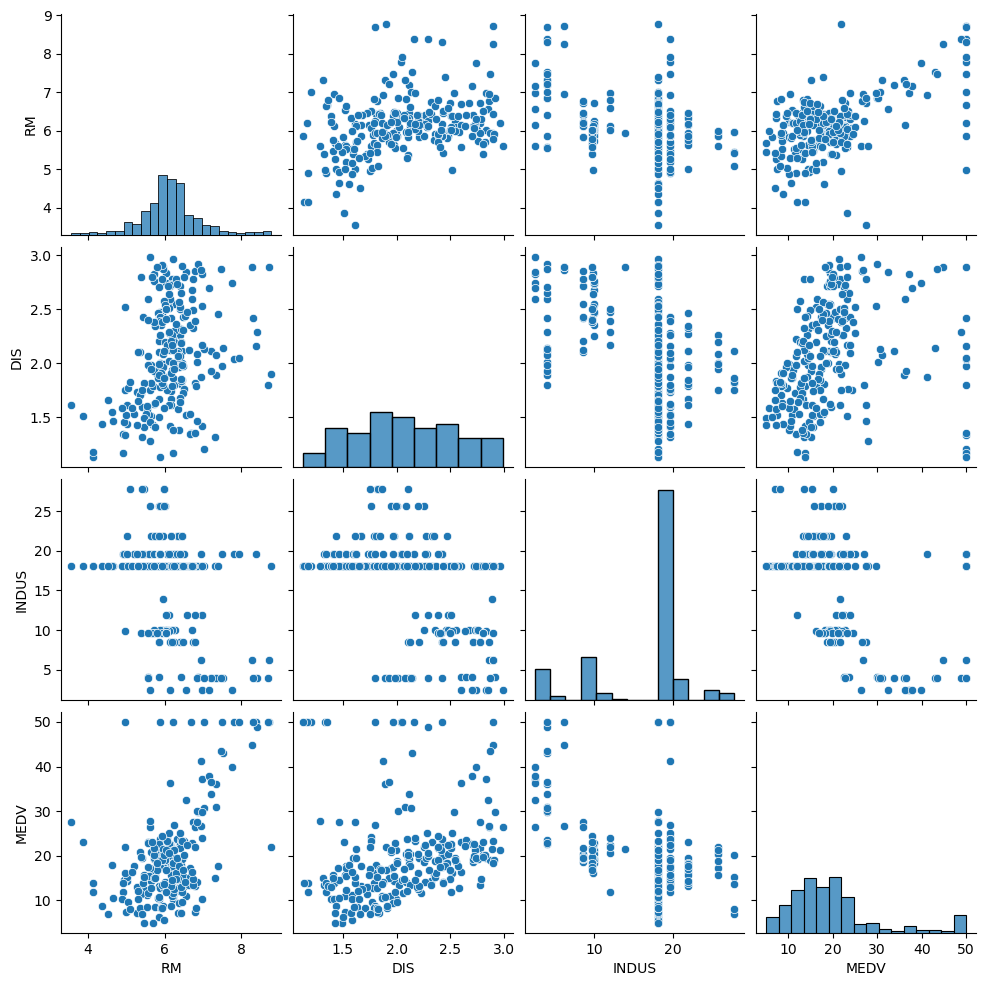

In [13]:
# specify the columns of interest, replace the None
# columns: list[str] = [None]

# use conditions for row selector and column selector
# replace the None
# df_1: pd.DataFrame = None

###BEGIN SOLUTION

###END SOLUTION

myplot: sns.axisgrid.PairGrid = sns.pairplot(data=df_1)

- **Task 2:** All records with average number of room between 5 to 8 (both inclusive).


/Users/oka_kurniawan/opt/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


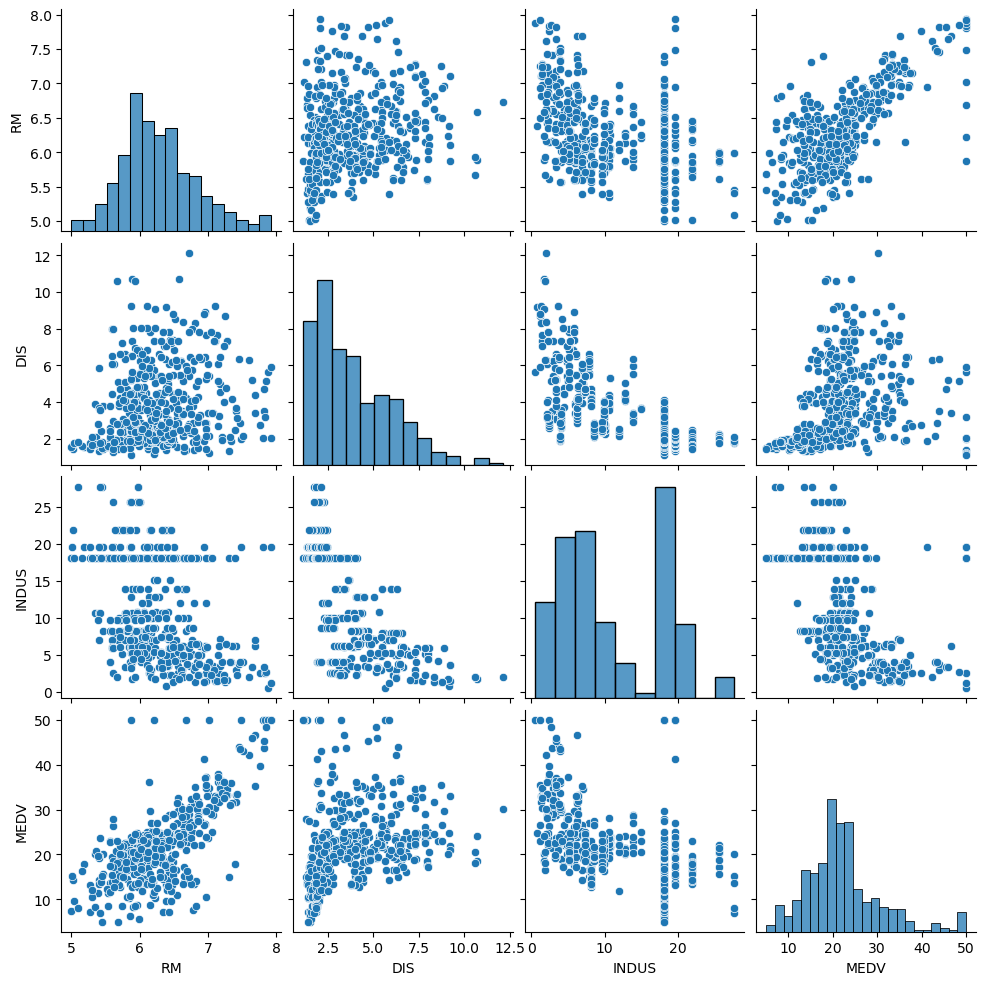

In [15]:
# specify the columns of interest, replace the None
# columns: list[str] = [None]

# use conditions for row selector and column selector
# replace the None
# df_2: pd.DataFrame = None

###BEGIN SOLUTION
###END SOLUTION

myplot: sns.axisgrid.PairGrid = sns.pairplot(data=df_2)

- **Task 3:** The first 15 records in the table.


In [17]:
# specify the columns of interest, replace the None
# columns: list[str] = [None]

# use conditions for row selector and column selector
# replace the None
# df_3: pd.DataFrame = None

###BEGIN SOLUTION
###END SOLUTION

display(df_3)


,RM,DIS,INDUS,MEDV
0,6.575,4.0900,2.31,24.0
1,6.421,4.9671,7.07,21.6
2,7.185,4.9671,7.07,34.7
3,6.998,6.0622,2.18,33.4
4,7.147,6.0622,2.18,36.2
5,6.430,6.0622,2.18,28.7
6,6.012,5.5605,7.87,22.9
7,6.172,5.9505,7.87,27.1
8,5.631,6.0821,7.87,16.5
9,6.004,6.5921,7.87,18.9


- **Task 4:** The last 15 records in the table.


In [19]:
# specify the columns of interest, replace the None
# columns: list[str] = [None]

# use conditions for row selector and column selector
# replace the None
# df_4: pd.DataFrame = None

###BEGIN SOLUTION
###END SOLUTION

display(df_4)

,RM,DIS,INDUS,MEDV
491,5.983,1.8681,27.74,13.6
492,5.983,2.1099,27.74,20.1
493,5.707,2.3817,9.69,21.8
494,5.926,2.3817,9.69,24.5
495,5.670,2.7986,9.69,23.1
496,5.390,2.7986,9.69,19.7
497,5.794,2.8927,9.69,18.3
498,6.019,2.4091,9.69,21.2
499,5.569,2.3999,9.69,17.5
500,6.027,2.4982,9.69,16.8


- **Task 5:** All records with even index numbers, i.e. index 0, 2, 4, ... .


In [21]:
# specify the columns of interest, replace the None
# columns: list[str] = [None]

# use conditions for row selector and column selector
# replace the None
# df_5: pd.DataFrame = None

###BEGIN SOLUTION

###END SOLUTION

display(df_5)

,RM,DIS,INDUS,MEDV
0,6.575,4.0900,2.31,24.0
2,7.185,4.9671,7.07,34.7
4,7.147,6.0622,2.18,36.2
6,6.012,5.5605,7.87,22.9
8,5.631,6.0821,7.87,16.5
...,...,...,...,...
496,5.390,2.7986,9.69,19.7
498,6.019,2.4091,9.69,21.2
500,6.027,2.4982,9.69,16.8
502,6.120,2.2875,11.93,20.6


**CS3.** *Histogram and Box plot:* Plot the histogram for the median value in \$1000 for the Boston's housing price. 


Reference:
- [Histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html)
- [Box plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

- **Task 1:** Plot the histogram with default bin values.

Text(0, 0.5, 'Count')

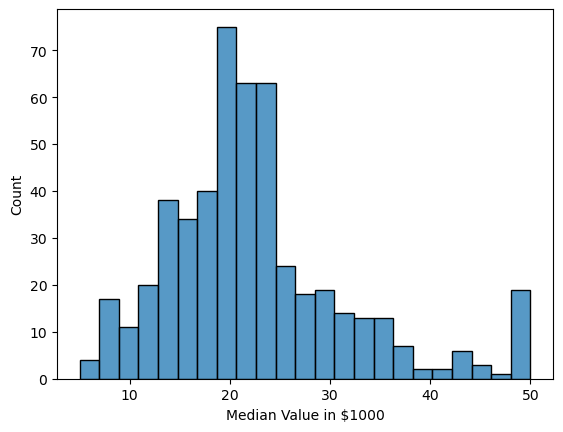

In [23]:
# plot histogram for MEDV, replace the None
# myplot: axes.Axes = None

# set the x label, write the code below

# set the y label, write the code below

###BEGIN SOLUTION
###END SOLUTION

- **Task 2:** Plot the histogram with 5 bins only. Hint:


Text(0, 0.5, 'Count')

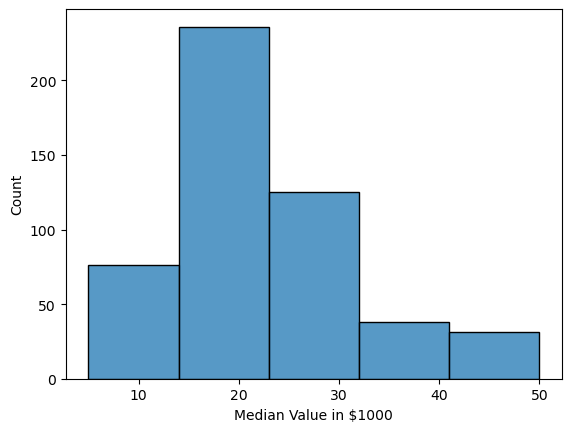

In [24]:
# plot histogram for MEDV, replace the None
# myplot: axes.Axes = None

# set the x label, write the code below

# set the y label, write the code below

###BEGIN SOLUTION

###END SOLUTION

- **Task 3:** Plot the histogram with the following bin edges `0, 10, 20, 30, 40, 50`.

Text(0, 0.5, 'Count')

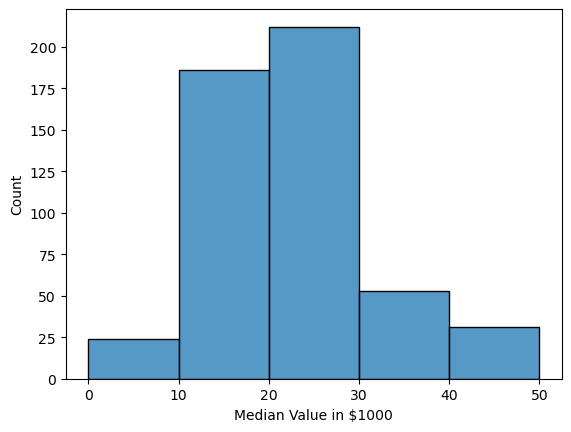

In [25]:
# plot histogram for MEDV, replace the None
# myplot: axes.Axes = None

# set the x label, write the code below

# set the y label, write the code below

###BEGIN SOLUTION

###END SOLUTION

- **Task 4:** Plot the same data using a box plot in a horizontal manner.

Text(0.5, 0, 'Median Value in $1000')

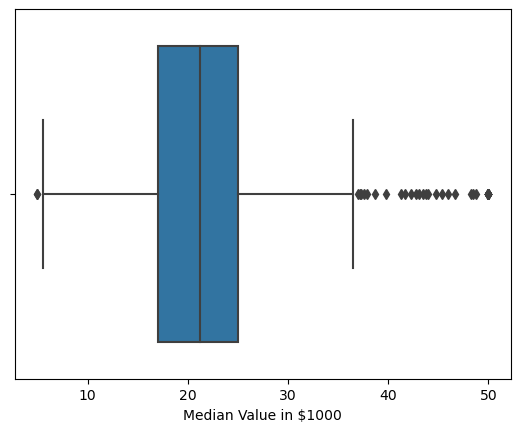

In [26]:
# plot boxplot for MEDV, replace the None
# myplot: axes.Axes = None

# set the x label, write the code below

###BEGIN SOLUTION

###END SOLUTION

**CS4.** *Scatter plot:* Do the following plots. 

- **Task 1:** Display scatter plot of "MEDV" versus "RM". Hint: 
    - Use Seaborn default theme instead of matplotlib
    - [Seaborn scatter plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
    - Use "RM" as x data
    - Use "MEDV" as y data


In [27]:
# Set the theme parameter to Seaborn's default
sns.set()

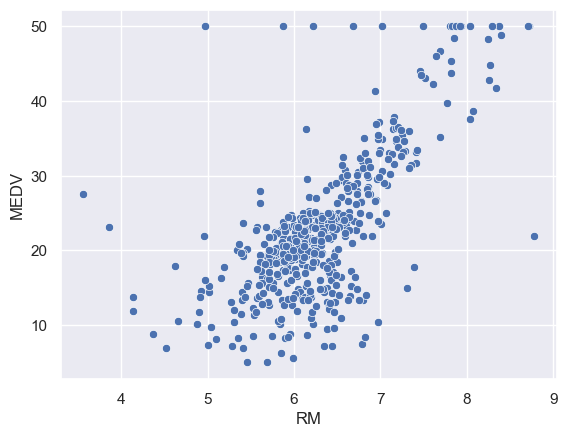

In [28]:
# Task 5
# plot scatter plot, replace the None 
# myplot: axes.Axes = sns.scatterplot(x=None, y=None, data=None)

###BEGIN SOLUTION
###END SOLUTION

- **Task 2:** Display a scatter plot "Median value of owner-occupied homes in \$1000s" versus "weighted distances to ﬁve Boston employment centers". Use average number of rooms per dwelling as the hue data.


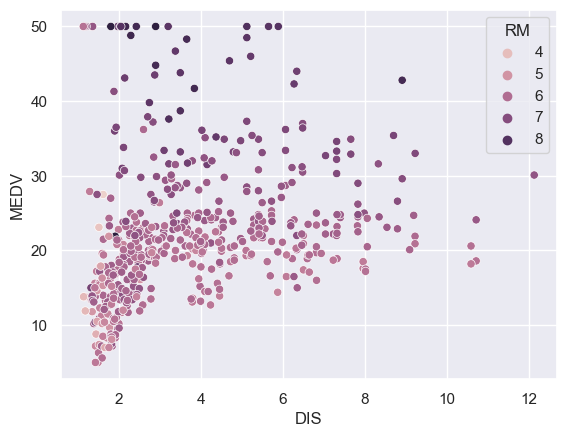

In [29]:
# Task 6
# plot using scatter plot
# replace the None
# myplot: axes.Axes = None

###BEGIN SOLUTION
###END SOLUTION

- **Task 3:** Display a scatter plot "Median value of owner-occupied homes in \$1000s" versus "proportion of non-retail business acres per town" . Use "proportion of residential land zoned for lots over 25,000 sq.ft." as the hue data.


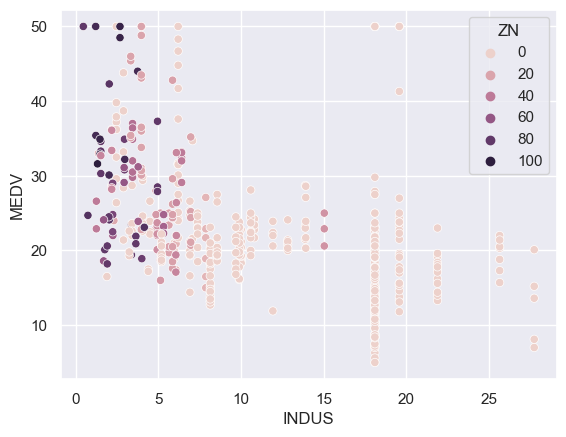

In [30]:
# Task 3
# plot using scatter plot and use "hue"
# replace the None
# myplot: axes.Axes = sns.scatterplot(x=None, y=None, hue=None, data=None)

###BEGIN SOLUTION
###END SOLUTION

Answer the following:
- How many columns are there?
- How many rows are there?
- What are the names of the columns
- What is the range of the median value in \$1000 when the average number of room per dwelling is 8?
- What's the relationship between distance to five Boston's employment centres and the median value in \$1000?
- What's the relationship between the proportion of non-retail business acres per town and the median value in \$1000?

**CS5.** *Splitting Data Randomly:* Create a function to split the Data Frame randomly. The function should have the following arguments:
- `df_feature`: which is the data frame for the features.
- `df_target`: which is the data frame for the target.
- `random_state`: which is the seed used to split randomly.
- `test_size`: which is the fraction for the test data set (0 to 1), by default is set to 0.5

The output of the function is a tuple of four items:
- `df_feature_train`: which is the train set for the features data frame
- `df_feature_test`: which is the test set for the features data frame
- `df_target_train`: which is the train set for the target data frame
- `df_target_test`: which is the test set for the target data frame

Hint:
- Use [`numpy.random.choice()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html) to select the indices for the test data set.
- Use [`pandas.DataFrame.drop()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) to drop the indices in the test data set to obtain the train data set.


In [40]:
def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame, 
               random_state: Optional[int]=None, 
               test_size: float=0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    ###BEGIN SOLUTION

    ###END SOLUTION
    return df_feature_train, df_feature_test, df_target_train, df_target_test
    


In [41]:
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.3)

display(df_feature_train.describe())
display(df_feature_test.describe())
display(df_target_train.describe())
display(df_target_test.describe())

assert np.all(df_feature_train.count() == 355)
assert np.all(df_feature_test.count() == 151)
assert np.all(df_target_train.count() == 355)
assert np.all(df_target_test.count() == 151)

assert np.isclose(df_feature_train["RM"].mean(), 6.2968)
assert np.isclose(df_feature_test["DIS"].std(), 2.2369)
assert np.isclose(df_target_train["MEDV"].median(), 21.40)
assert np.isclose(df_target_test["MEDV"].median(), 20.90)


,RM,DIS,INDUS
count,355.000000,355.000000,355.000000
mean,6.296834,3.813837,10.926958
std,0.721796,2.050359,6.773885
min,3.561000,1.137000,1.210000
25%,5.909000,2.122300,5.130000
50%,6.229000,3.279700,8.560000
75%,6.652000,5.222850,18.100000
max,8.780000,10.710300,27.740000


,RM,DIS,INDUS
count,151.000000,151.000000,151.000000
mean,6.255954,3.750857,11.630066
std,0.656743,2.236889,7.057713
min,4.368000,1.129600,0.460000
25%,5.875500,1.974050,5.750000
50%,6.167000,2.915300,9.900000
75%,6.545500,5.057250,18.100000
max,8.725000,12.126500,27.740000


,MEDV
count,355.000000
mean,22.668169
std,8.871527
min,5.000000
25%,17.450000
50%,21.400000
75%,25.000000
max,50.000000


,MEDV
count,151.000000
mean,22.214570
std,9.944274
min,6.300000
25%,15.350000
50%,20.900000
75%,24.700000
max,50.000000


**CS6.** *Standardization:* Write a function that takes in **two dimensional numpy array** where each of the column is one feature  in the data. The function should normalize each column according to the formula below. The function should also take in two optional arguments containing the means of each column and the standard deviation for each column. If these lists are not provided, the means and the standard deviation are computed from the input data.

$$normalized = \frac{data - \mu}{\sigma}$$

where $\mu$ is the mean of the data and $\sigma$ is the standard deviation of the data. **You need to normalize for each column respectively**. The function should return a new **two dimensional numpy array** as well as two **one dimensional numpy array** of mean and standard deviation that is used to normalized each column.

Use the following functions from Numpy:
- `np.mean(array, axis=0)`: This is to calculate the mean along the row axis (vertical).
- `np.std(array, axis=0)`: This is to calculate the standard deviation along the row axis (vertical).

Note: 
- Your function should be able to take in a single data point given as numpy array.

In [43]:
def normalize_z(array: np.ndarray, columns_means: Optional[np.ndarray]=None, 
                columns_stds: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    ###BEGIN SOLUTION

    ###END SOLUTION
    return out, columns_means, columns_stds


In [44]:
feature_array: np.ndarray = df_feature.to_numpy()
data_norm, columns_means, columns_stds = normalize_z(feature_array)
print(data_norm,columns_means, columns_stds)
data_df: pd.DataFrame = pd.DataFrame(data_norm, columns=df_feature.columns)
stats: pd.DataFrame = data_df.describe()
display(stats)
assert isinstance(data_norm, np.ndarray)
assert np.isclose(stats.loc["mean", "RM"], 0.0) and \
       np.isclose(stats.loc["std", "RM"], 1.0, atol=1e-3)
assert np.isclose(stats.loc["mean", "DIS"], 0.0) and \
       np.isclose(stats.loc["std", "DIS"], 1.0, atol=1e-3)
assert np.isclose(stats.loc["mean", "INDUS"], 0.0) and \
       np.isclose(stats.loc["std", "INDUS"], 1.0, atol=1e-3)
assert np.isclose(columns_means[0], 6.2846)
assert np.isclose(columns_stds[2], 6.8536)

[[ 0.41367189  0.1402136  -1.2879095 ]
 [ 0.19427445  0.55715988 -0.59338101]
 [ 1.28271368  0.55715988 -0.59338101]
 ...
 [ 0.98496002 -0.77368357  0.11573841]
 [ 0.72567214 -0.66843684  0.11573841]
 [-0.36276709 -0.61324648  0.11573841]] [ 6.28463439  3.79504269 11.13677866] [0.70192251 2.10362836 6.85357058]


,RM,DIS,INDUS
count,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.088282e-16,-8.425408e-17,2.106352e-16
std,1.000990e+00,1.000990e+00,1.000990e+00
min,-3.880249e+00,-1.267069e+00,-1.557842e+00
25%,-5.686303e-01,-8.056878e-01,-8.676906e-01
50%,-1.084655e-01,-2.793234e-01,-2.110985e-01
75%,4.827678e-01,6.623709e-01,1.015999e+00
max,3.555044e+00,3.960518e+00,2.422565e+00


In [46]:
data_norm,_, _ = normalize_z(df_feature.to_numpy())
assert np.isclose(data_norm[:,0].mean(), 0.0) and \
       np.isclose(data_norm[:,0].std(), 1.0, atol=1e-3)
assert np.isclose(data_norm[:,1].mean(), 0.0) and \
       np.isclose(data_norm[:,1].std(), 1.0, atol=1e-3)
assert np.isclose(data_norm[:,2].mean(), 0.0) and \
       np.isclose(data_norm[:,2].std(), 1.0, atol=1e-3)

In [48]:
input_1row: np.ndarray = np.array([6.593, 2.4786, 11.93])
means: np.ndarray = np.array([6.284634, 3.795043, 11.136779])
stds: np.ndarray = np.array([0.702617, 2.105710, 6.860353])
data_norm,_, _ = normalize_z(input_1row, means, stds)
print(data_norm)
assert np.isclose(data_norm[0], 0.43888, atol=1e-3)
assert np.isclose(data_norm[1], -0.625, atol=1e-3)
assert np.isclose(data_norm[2], 0.1156, atol=1e-3)

[ 0.43888207 -0.62517773  0.11562393]
